In [2]:
import pandas as pd
import numpy as np
import requests
import time
import json
import prettytable
import matplotlib.pyplot as plt


In [4]:
file_path = 'jobs_age_df.csv'
df = pd.read_csv(file_path)
df

,year,period,periodName,0,1,2,3,4,5
0,2009,M01,January,18287,30438,32274,33942,20918,6130
1,2009,M02,February,18300,30295,32052,33867,21003,5966
2,2009,M03,March,18067,30170,31726,33773,20945,6055
3,2009,M04,April,18092,30082,31734,33801,21052,6034
4,2009,M05,May,17817,29924,31639,33683,21182,6132
...,...,...,...,...,...,...,...,...,...
115,2018,M08,August,18721,35352,32655,32322,26578,9687
116,2018,M09,September,19130,35511,32501,32320,26709,9933
117,2018,M10,October,19156,35693,32857,32343,26828,9925
118,2018,M11,November,19164,35672,32796,32376,26855,10046


In [7]:
job_age_df = df.rename(columns={'0':'16-24 Age Group',
                              '1': '25-34 Age Group',
                              '2': '35-44 Age Group',
                              '3': '45-54 Age Group',
                              '4': '55-64 Age Group',
                              '5': '65 and Over Group'})
job_age_df.head()

,year,period,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group
0,2009,M01,January,18287,30438,32274,33942,20918,6130
1,2009,M02,February,18300,30295,32052,33867,21003,5966
2,2009,M03,March,18067,30170,31726,33773,20945,6055
3,2009,M04,April,18092,30082,31734,33801,21052,6034
4,2009,M05,May,17817,29924,31639,33683,21182,6132


In [8]:
z = [ row['16-24 Age Group'] + row['25-34 Age Group'] + row['35-44 Age Group'] + row['45-54 Age Group'] + row['55-64 Age Group'] + row['65 and Over Group'] for index, row in job_age_df.iterrows() ]
job_age_df['Total Employment'] = z
job_age_df

,year,period,periodName,16-24 Age Group,25-34 Age Group,35-44 Age Group,45-54 Age Group,55-64 Age Group,65 and Over Group,Total Employment
0,2009,M01,January,18287,30438,32274,33942,20918,6130,141989
1,2009,M02,February,18300,30295,32052,33867,21003,5966,141483
2,2009,M03,March,18067,30170,31726,33773,20945,6055,140736
3,2009,M04,April,18092,30082,31734,33801,21052,6034,140795
4,2009,M05,May,17817,29924,31639,33683,21182,6132,140377
...,...,...,...,...,...,...,...,...,...,...
115,2018,M08,August,18721,35352,32655,32322,26578,9687,155315
116,2018,M09,September,19130,35511,32501,32320,26709,9933,156104
117,2018,M10,October,19156,35693,32857,32343,26828,9925,156802
118,2018,M11,November,19164,35672,32796,32376,26855,10046,156909


## Hypothesis Questions
* Gross trends in employment by age group: younger groups will experience slower (or even negative) job growth as opposed to older groups who performed better
* Older groups will grow as a percentage of those employed
* Trends in employment should continue (based on regression analysis)


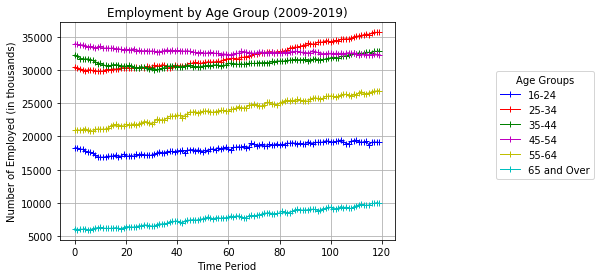

In [11]:
group_16_24 = plt.plot(job_age_df.index, job_age_df['16-24 Age Group'], marker="+",color="blue", linewidth=1, label="16-24")
group_25_34 = plt.plot(job_age_df.index, job_age_df['25-34 Age Group'], marker="+",color="red", linewidth=1, label="25-34")
group_35_44 = plt.plot(job_age_df.index, job_age_df['35-44 Age Group'], marker="+",color="g", linewidth=1, label="35-44")
group_45_54 = plt.plot(job_age_df.index, job_age_df['45-54 Age Group'], marker="+",color="m", linewidth=1, label="45-54")
group_55_64 = plt.plot(job_age_df.index, job_age_df['55-64 Age Group'], marker="+",color="y", linewidth=1, label="55-64")
group_65_over = plt.plot(job_age_df.index, job_age_df['65 and Over Group'], marker="+",color="c", linewidth=1, label="65 and Over")
#group_total = plt.plot(job_age_df['index'], job_age_df['Total Employment'], marker="+",color="k", linewidth=1, label="Total")
plt.title('Employment by Age Group (2009-2019)')
plt.xlabel('Time Period')
plt.ylabel('Number of Employed (in thousands)')
plt.grid()

legend = plt.legend(title='Age Groups', loc='upper center',  bbox_to_anchor=(1.45, 0.8))
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]
legend.legendHandles[4]._sizes = [30]
legend.legendHandles[5]._sizes = [30]

